In [1]:
# Install if not already available
!pip install scikit-learn pandas matplotlib seaborn

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the Adult dataset from OpenML
data = fetch_openml('adult', version=2, as_frame=True)
df = data.frame




In [3]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'class'],
      dtype='object')

In [5]:
print(len(df))

48842


In [6]:
# Check how many missing values in each column
print("Missing values before dropping:")
print(df.replace("?", np.nan).isnull().sum())


Missing values before dropping:
age                  0
workclass         2799
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        2809
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     857
class                0
dtype: int64


In [7]:
# Percent of missing values per column
(df.replace("?", np.nan).isnull().mean() * 100).round(2)


age               0.00
workclass         5.73
fnlwgt            0.00
education         0.00
education-num     0.00
marital-status    0.00
occupation        5.75
relationship      0.00
race              0.00
sex               0.00
capital-gain      0.00
capital-loss      0.00
hours-per-week    0.00
native-country    1.75
class             0.00
dtype: float64

In [9]:
# Select features first (before dropping)
df_subset = df[['age', 'education-num', 'hours-per-week', 'sex', 'class']]

# Describe numeric columns
print(df_subset.describe())

# Check distribution of categorical columns
print("\nGender distribution:")
print(df_subset['sex'].value_counts())

print("\nTarget (income) distribution:")
print(df_subset['class'].value_counts())


                age  education-num  hours-per-week
count  48842.000000   48842.000000    48842.000000
mean      38.643585      10.078089       40.422382
std       13.710510       2.570973       12.391444
min       17.000000       1.000000        1.000000
25%       28.000000       9.000000       40.000000
50%       37.000000      10.000000       40.000000
75%       48.000000      12.000000       45.000000
max       90.000000      16.000000       99.000000

Gender distribution:
sex
Male      32650
Female    16192
Name: count, dtype: int64

Target (income) distribution:
class
<=50K    37155
>50K     11687
Name: count, dtype: int64


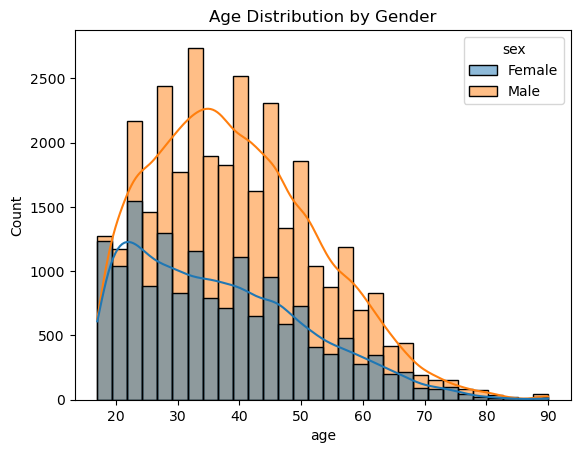

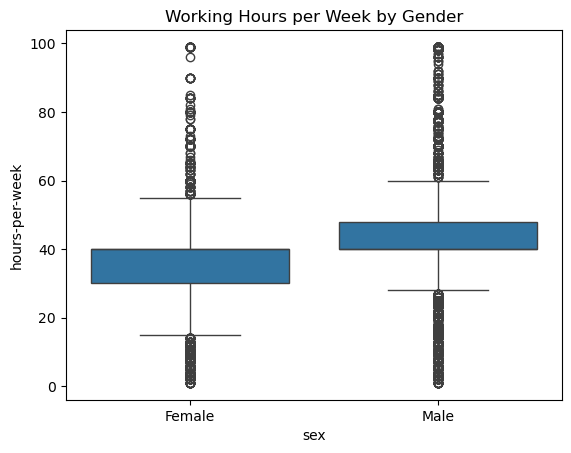

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution by gender
sns.histplot(data=df_subset, x='age', hue='sex', bins=30, kde=True)
plt.title("Age Distribution by Gender")
plt.show()

# Hours per week
sns.boxplot(data=df_subset, x='sex', y='hours-per-week')
plt.title("Working Hours per Week by Gender")
plt.show()


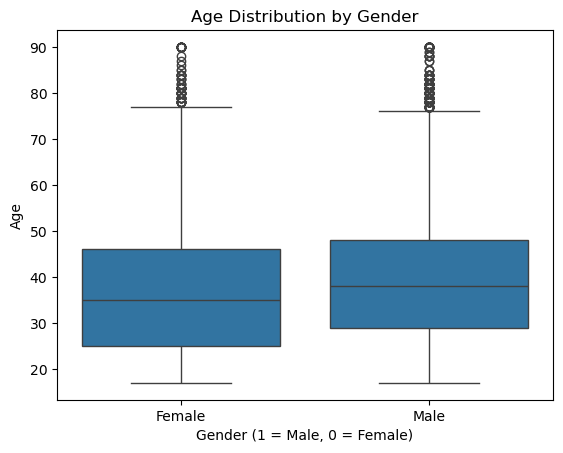

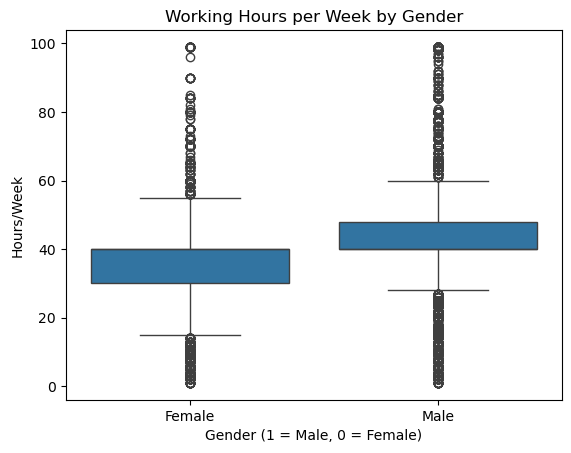

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Age
sns.boxplot(data=df, x='sex', y='age')
plt.title("Age Distribution by Gender")
plt.xlabel("Gender (1 = Male, 0 = Female)")
plt.ylabel("Age")
plt.show()

# Boxplot for Hours per Week
sns.boxplot(data=df, x='sex', y='hours-per-week')
plt.title("Working Hours per Week by Gender")
plt.xlabel("Gender (1 = Male, 0 = Female)")
plt.ylabel("Hours/Week")
plt.show()


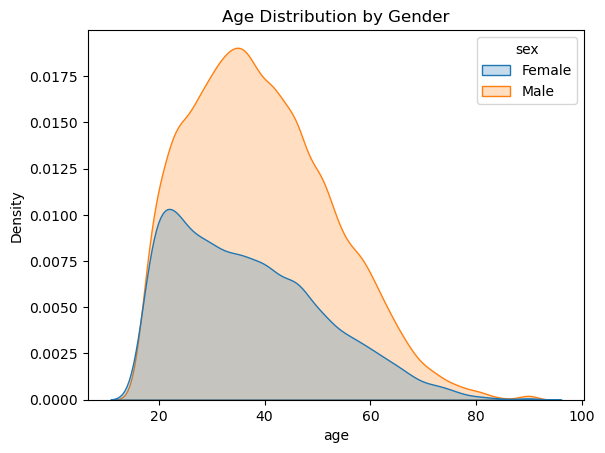

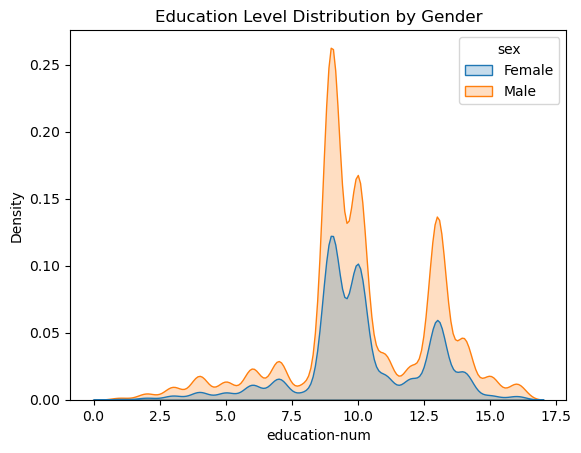

In [21]:
# KDE Plot for Age
sns.kdeplot(data=df, x='age', hue='sex', fill=True)
plt.title("Age Distribution by Gender")
plt.show()

# KDE Plot for Education
sns.kdeplot(data=df, x='education-num', hue='sex', fill=True)
plt.title("Education Level Distribution by Gender")
plt.show()


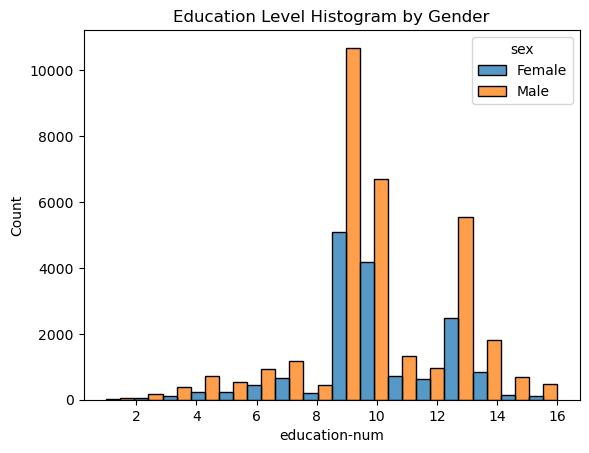

In [22]:
sns.histplot(data=df, x='education-num', hue='sex', bins=16, multiple='dodge')
plt.title("Education Level Histogram by Gender")
plt.show()


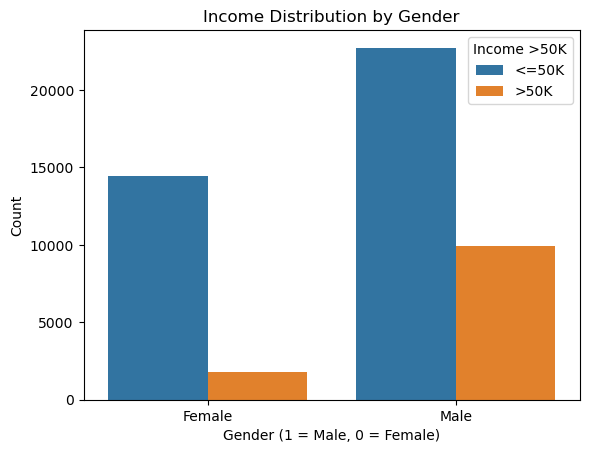

In [25]:
sns.countplot(data=df, x='sex', hue='class')
plt.title("Income Distribution by Gender")
plt.xlabel("Gender (1 = Male, 0 = Female)")
plt.ylabel("Count")
plt.legend(title="Income >50K")
plt.show()


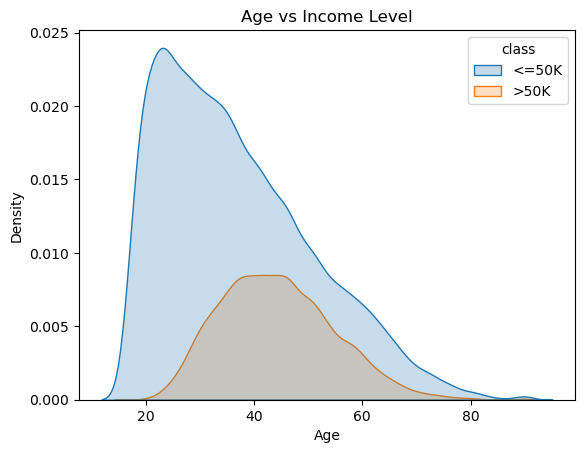

In [27]:
sns.kdeplot(data=df, x='age', hue='class', fill=True)
plt.title("Age vs Income Level")
plt.xlabel("Age")
plt.show()


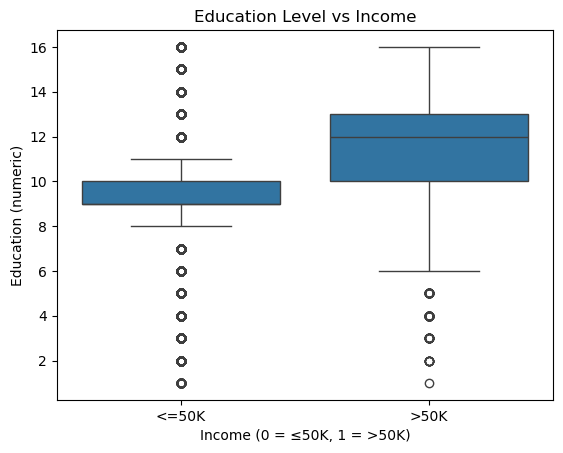

In [29]:
sns.boxplot(data=df, x='class', y='education-num')
plt.title("Education Level vs Income")
plt.xlabel("Income (0 = ≤50K, 1 = >50K)")
plt.ylabel("Education (numeric)")
plt.show()


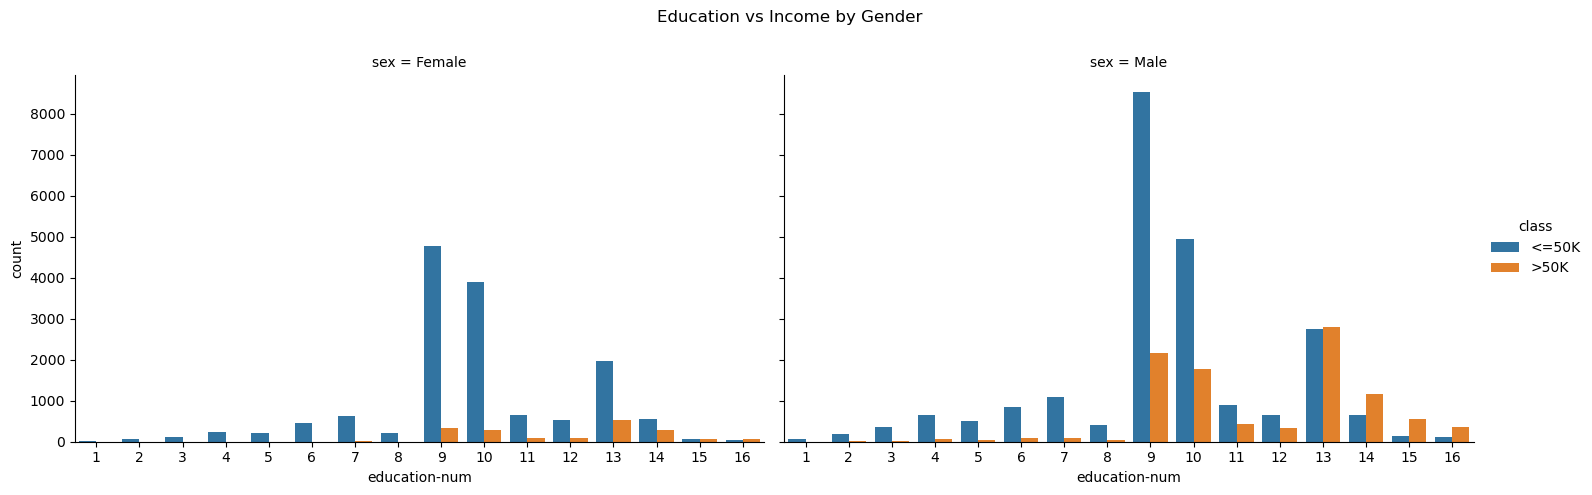

In [30]:
sns.catplot(data=df, x='education-num', hue='class', col='sex', kind='count', height=5, aspect=1.5)
plt.subplots_adjust(top=0.85)
plt.suptitle("Education vs Income by Gender")
plt.show()


In [33]:
from scipy.stats import ttest_ind

# Split by gender
age_male = df[df['sex'] == 1]['age']
age_female = df[df['sex'] == 0]['age']

t_stat_age, p_val_age = ttest_ind(age_male, age_female, equal_var=False)
print(f"T-test for Age by Gender → t = {t_stat_age:.2f}, p = {p_val_age:.4f}")


T-test for Age by Gender → t = nan, p = nan


In [41]:
print(df['age'].isnull().sum())
print(df['education-num'].isnull().sum())
print(df['sex'].isnull().sum())


0
0
0


In [43]:
print(df[df['sex'] == 1]['age'].describe())
print(df[df['sex'] == 0]['age'].describe())


count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age, dtype: float64
count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: age, dtype: float64


In [45]:
age_male = df[df['sex'] == 1]['age'].dropna()
age_female = df[df['sex'] == 0]['age'].dropna()


T-test for Age by Gender → t = nan, p = nan


In [35]:
edu_male = df[df['sex'] == 1]['education-num']
edu_female = df[df['sex'] == 0]['education-num']

t_stat_edu, p_val_edu = ttest_ind(edu_male, edu_female, equal_var=False)
print(f"T-test for Education Level by Gender → t = {t_stat_edu:.2f}, p = {p_val_edu:.4f}")


T-test for Education Level by Gender → t = nan, p = nan


In [37]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(df['sex'], df['class'])

# Run the chi-square test
chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square test for Gender vs Income → χ² = {chi2_stat:.2f}, p = {p_val:.4f}")


Chi-square test for Gender vs Income → χ² = 2248.85, p = 0.0000


In [39]:
# Drop missing values and select useful features
df = df.replace("?", np.nan).dropna()


# Encode target and sensitive attribute
df['income'] = (df['income'] == '>50K').astype(int)  # 1 = high income
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})  # 1 = Male, 0 = Female

# Feature matrix and target
X = df.drop(columns='income')
y = df['income']

KeyError: 'income'

In [ ]:
print(len(df))

In [ ]:
# Feature matrix and target
X = df.drop(columns='income')
y = df['income']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# ✅ Train-test split: 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ✅ Train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# ✅ Predict probabilities on test set
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of class 1 (>50K)


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# Plot
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Overall ROC Curve")
plt.legend()
plt.grid(True)
plt.show()
